In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [32]:
func = lambda x: x**2 - 15 * x + 1
grad_func = lambda x: 2*x - 15
hess_func = lambda x: 2

In [3]:
def plot_functions(func, grad_func, hess_func, x_values):
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, func(x_values), color='blue')
    plt.grid(True)
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, grad_func(x_values),  color='blue')
    plt.grid(True)
    y_value_hess = hess_func(0)
    y_values_hess = np.full_like(x_values, y_value_hess)
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values_hess,  color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


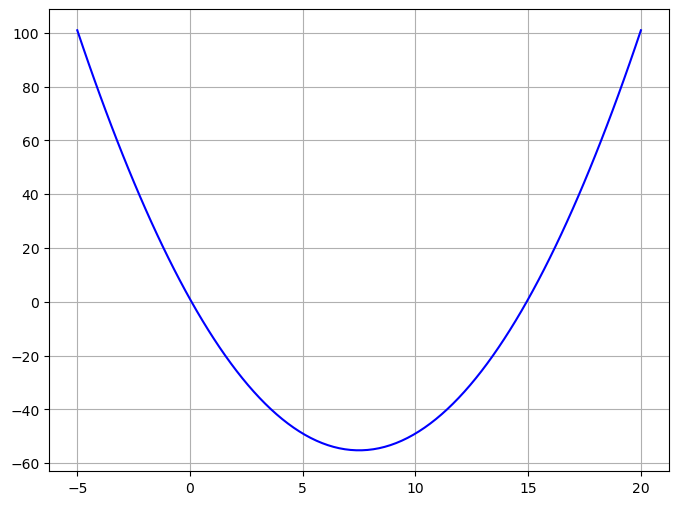

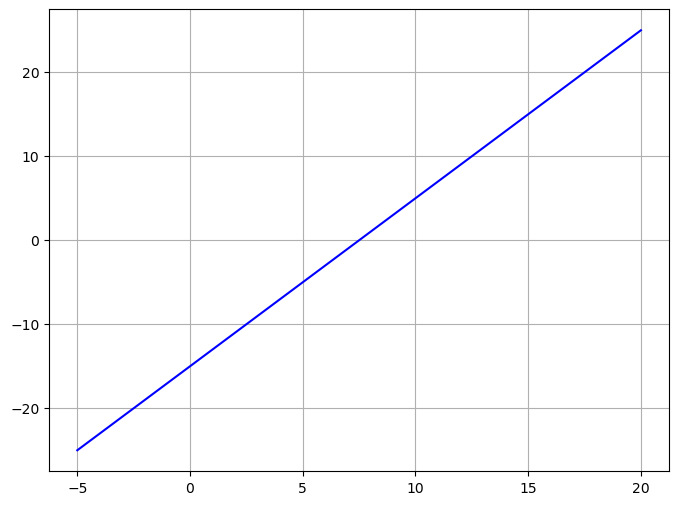

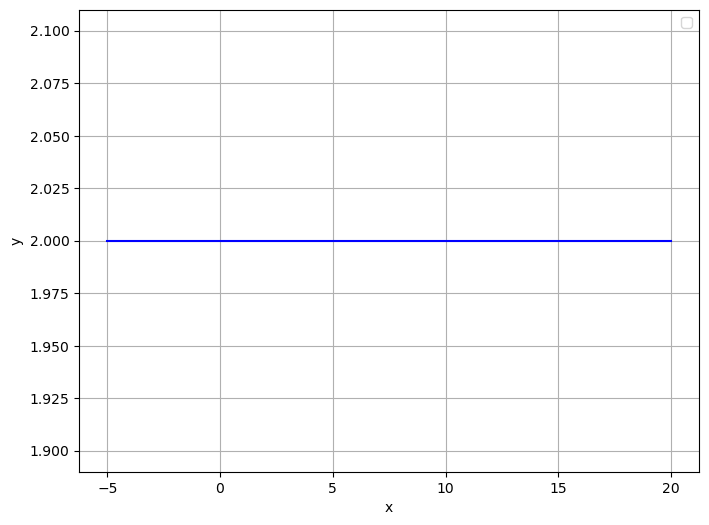

In [178]:
plot_functions(func, grad_func, hess_func, x_values)

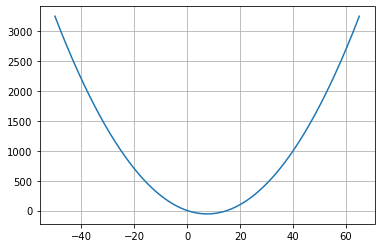

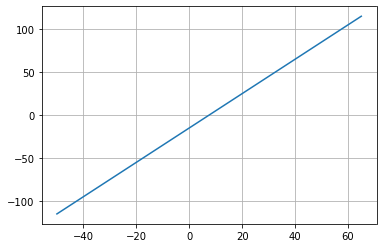

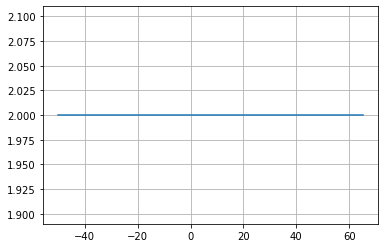

In [4]:
def gradient_descent(func, grad_func, x0, learning_rate, epsilon, max_iter=1000):
    x = x0
    for i in range(max_iter):
        grad = grad_func(x)
        x = x - learning_rate * grad
        if np.abs(grad) < epsilon:
            break     
    return x, func(x), i+1

In [5]:
x0 = 40
learning_rate = 0.01
epsilon = 0.1

In [6]:
x_opt, min_value, iterations = gradient_descent(func, grad_func, x0, learning_rate, epsilon)
print(f"GD Results with x0 = {x0}, lr = {learning_rate}, epsilon = {epsilon}")
print(f"Found solution after {iterations} iterations.")
print(f"x_min = {x_opt}")
print(f"Gradient = {grad_func(x_opt)}")

GD Results with x0 = 40, lr = 0.01, epsilon = 0.1
Found solution after 322 iterations.
x_min = 7.548604864188269
Gradient = 0.09720972837653719


In [ ]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [ ]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1

In [12]:
def newtons_method(func, grad_func, hess_func, x0, learning_rate=1, epsilon=1e-6, max_iter=1000):
    x = x0
    for i in range(max_iter):
        grad = grad_func(x)
        hess = hess_func(x)  
        if np.isscalar(hess):
            x = x - learning_rate * grad / hess if learning_rate is not None else x - grad / hess
        else:
            x = x - learning_rate * np.linalg.solve(hess, grad) if learning_rate is not None else x - np.linalg.solve(hess, grad)   
        if np.linalg.norm(grad) < epsilon:
            break
    return x, func(x), i+1

In [13]:
x0 = 40
epsilon = 0.1

In [14]:
x_opt, min_value, iterations = newtons_method(func, grad_func, hess_func, x0, epsilon=epsilon)
print(f"Newton's Method Results without Learning Rate - x0 = {x0}, epsilon = {epsilon}")
print(f"Found solution after {iterations} iterations.")
print(f"x_min = {x_opt}")
print(f"Gradient = {grad_func(x_opt)}")

Newton's Method Results without Learning Rate - x0 = 40, epsilon = 0.1
Found solution after 2 iterations.
x_min = 7.5
Gradient = 0.0


In [ ]:
# Newton's method without learning rate, x0=40, epsilon = 0.1

Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [15]:
x0 = 40
learning_rate = 0.8
epsilon = 0.1

In [16]:
x_opt_lr, min_value_lr, iterations_lr = newtons_method(func, grad_func, hess_func, x0, learning_rate, epsilon)
print(f"\nNewton's Method Results with Learning Rate - x0 = {x0}, lr = {learning_rate}, epsilon = {epsilon}")
print(f"Found solution after {iterations_lr} iterations.")
print(f"x_min = {x_opt_lr}")
print(f"Gradient = {grad_func(x_opt_lr)}")


Newton's Method Results with Learning Rate - x0 = 40, lr = 0.8, epsilon = 0.1
Found solution after 6 iterations.
x_min = 7.50208
Gradient = 0.004160000000000608


In [ ]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1

Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [17]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

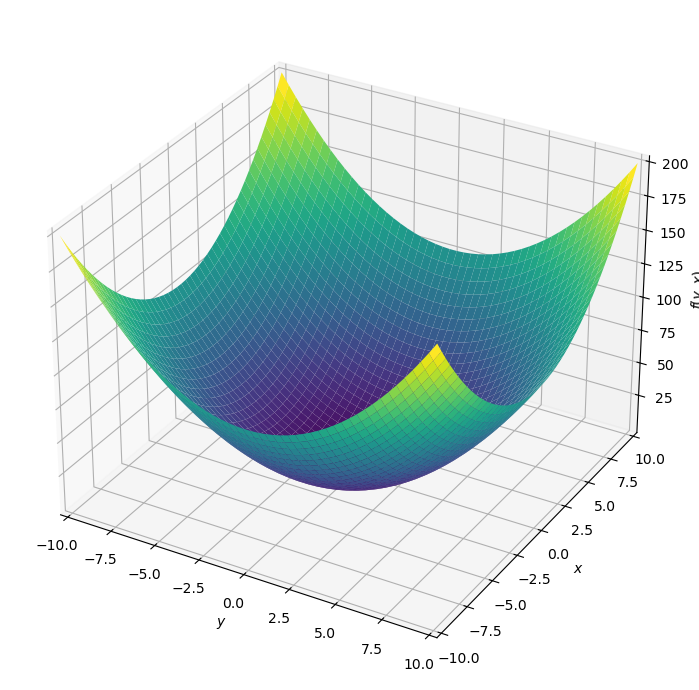

In [18]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

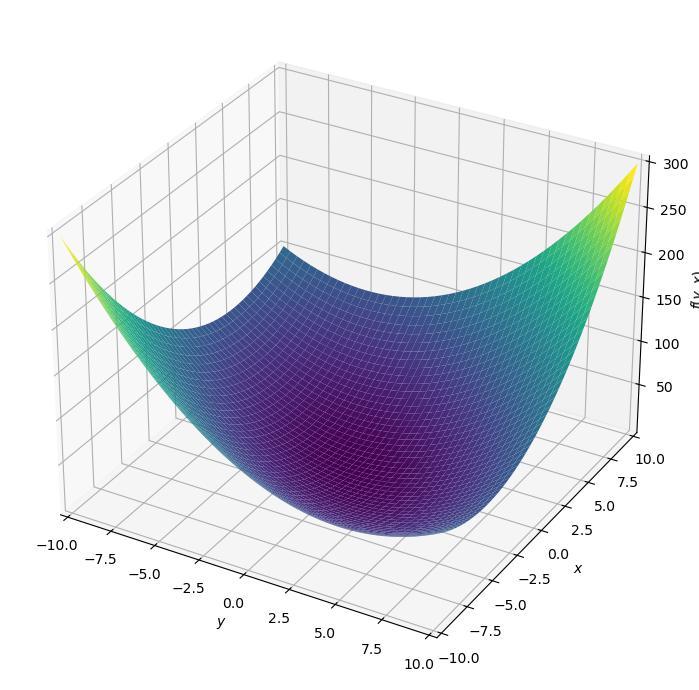

In [19]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$

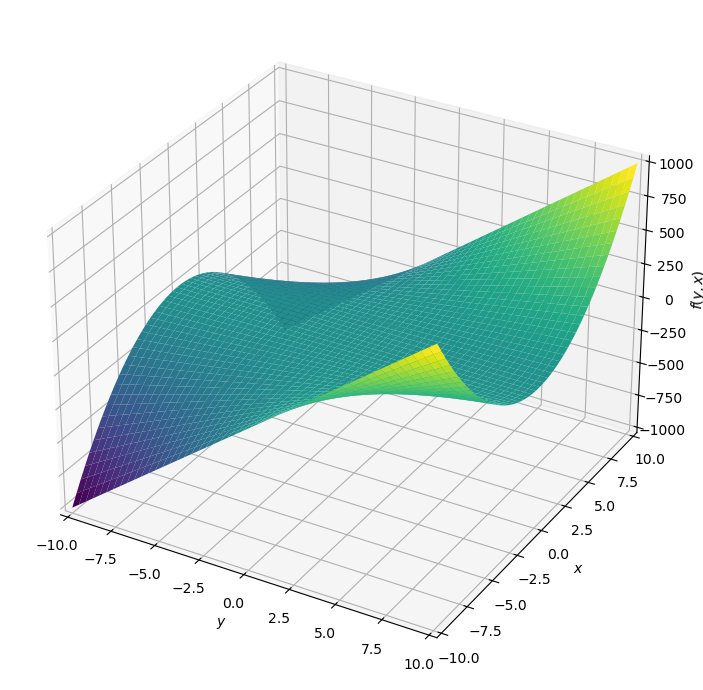

In [20]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [127]:
def multi_variable_gd(x, alpha=1, epsilon=0.001, max_iterations=1000, df=Df_1):
    iteration = 0
    gd = df(x)
    gd_norm = np.linalg.norm(gd)
    xmin = x
    while gd_norm > epsilon and iteration < max_iterations:
        x = x - alpha * gd
        gd = df(x)
        gd_norm = np.linalg.norm(gd)
        xmin = x
        iteration += 1
    print(f"Found solution after {iteration} iterations.\n")
    print(f"xy_min = {xmin}")
    print(f"Gradient = {gd}")
    return gd, xmin

In [128]:
f_1 = lambda x: x*2  + y*2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],[0,2]])

In [159]:
f_2 = lambda X: X[0]**2 + X[0]*X[1] + X[1]**2
Df_2 = lambda X: np.array([2*X[0] + X[1], X[0] + 2*X[1]])
DDf_2 = lambda X: np.array([[2, 1], [1, 2]])

In [172]:
f_3 = lambda X: X[0]**2 * X[1]
Df_3 = lambda X: np.array([2 * X[0] * X[1], X[0]**2])
DDf_3 = lambda X: np.array([[2 * X[1], 2 * X[0]], [2 * X[0], 0]])

In [196]:
f_3 = lambda x: x**2 * y
Df_3 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_3 = lambda X: np.array([[2*X[1],2*X[0]],[2*X[0],0]])

In [129]:
initial_x = np.array([10, 10])
learning_rate = 0.1
epsilon = 0.001
max_iterations = 1000

In [130]:
result, num_iterations = multi_variable_gd(initial_x, learning_rate, epsilon, max_iterations)
xy_min = result
gradient_at_min = Df_1(xy_min)

print("Optimal point:", xy_min)
print("Minimum value:", f_1(xy_min))
print("Gradient at the optimal point:", gradient_at_min)
print("Number of iterations:", num_iterations)

Found solution after 46 iterations.

xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]
Optimal point: [0.0006969 0.0006969]
Minimum value: [2*y + 0.00139379657490816 2*y + 0.00139379657490816]
Gradient at the optimal point: [0.0013938 0.0013938]
Number of iterations: [0.00034845 0.00034845]


In [106]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001

In [174]:
initial_x = np.array([10, 10])  # Initial guess
learning_rate = 0.5
epsilon = 0.001
max_iterations = 1000

In [175]:
result, num_iterations = multi_variable_gd(initial_x, learning_rate, epsilon, max_iterations)
xy_min = result
gradient_at_min = Df_1(xy_min)

print("Optimal point:", xy_min)
print("Gradient at the optimal point:", gradient_at_min)
print("Number of iterations:", num_iterations)

Found solution after 1 iterations.

xy_min = [0. 0.]
Gradient = [0. 0.]
Optimal point: [0. 0.]
Gradient at the optimal point: [0. 0.]
Number of iterations: [0. 0.]


In [ ]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [200]:
def newtons_method_m(initial_theta, epsilon, max_iterations, objective_function, gradient, hessian, alpha=1):
    theta = initial_theta
    iteration = 0
    while True:
        grad = gradient(theta)
        hess = hessian(theta)
        
        if np.linalg.norm(grad) < epsilon or iteration >= max_iterations:
            break
        theta = theta - alpha * np.linalg.inv(hess).dot(grad)

        iteration += 1
    return theta, iteration, grad

In [202]:
initial_theta = [10,10]
epsilon = 0.001
max_iterations = 1000

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_1, Df_1, DDf_1)


print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [ ]:
# First function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [203]:
initial_theta = [10,10]
epsilon = 0.001
max_iterations = 1000
learning_rate = 0.5

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_1, Df_1, DDf_1,learning_rate)
print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [ ]:
# First function
# Multi-variable Newton's method with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001

Found solution after 15 iterations.
xy_min =
 [[0.00030518]
 [0.00030518]]
Gradient =
 [[0.00061035]
 [0.00061035]]


In [204]:
initial_theta = [10.0, 10.0]
epsilon = 0.001
max_iterations = 1000
learning_rate = 0.5

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_2, Df_2, DDf_2,learning_rate)
print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [ ]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min =
 [[0.00015259]
 [0.00015259]]
Gradient =
 [[0.00045776]
 [0.00045776]]


In [205]:
initial_theta = [10.0, 10.0]
epsilon = 0.001
max_iterations = 1000

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_2, Df_2, DDf_2)
print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [ ]:
# Second function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [206]:
initial_theta = [10.0, 10.0]
epsilon = 0.001
max_iterations = 1000
learning_rate = 0.9

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_2, Df_2, DDf_2,learning_rate)
print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 5 iterations.
xy_min = [1.e-04 1.e-04]
Gradient = [0.0003 0.0003]


In [ ]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9,
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min =
 [[0.0001]
 [0.0001]]
Gradient =
 [[0.0003]
 [0.0003]]


In [ ]:
initial_x = np.array([10, 10])
learning_rate = 0.1
epsilon = 0.001
max_iterations = 1000
result, num_iterations = multi_variable_gd(initial_x, learning_rate, epsilon, max_iterations)
xy_min = result
gradient_at_min = Df_1(xy_min)

print("Optimal point:", xy_min)
print("Minimum value:", f_1(xy_min))
print("Gradient at the optimal point:", gradient_at_min)
print("Number of iterations:", num_iterations)

In [181]:
initial_point = np.array([10.0, 10.0])
learning_rate = 0.01
epsilon = 0.001
max_iterations = 1000

gradient, optimal_point = multi_variable_gd(initial_point, alpha=learning_rate, epsilon=epsilon, max_iterations=max_iterations, df=Df_3)

# Print results
print("Optimal point:", optimal_point)
print("Gradient at the optimal point:", gradient)

Found solution after 79 iterations.

xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]
Optimal point: [6.80598421e-05 6.85061189e+00]
Gradient at the optimal point: [9.32503127e-04 4.63214210e-09]


In [ ]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001



Found solution after 79 iterations.
xy_min =
 [[6.80598421e-05]
 [6.85061189e+00]]
Gradient =
 [[9.32503127e-04]
 [4.63214210e-09]]


In [201]:
initial_theta = [10.0, 10.0]
epsilon = 0.001
max_iterations = 1000

theta_min, num_iterations, gradient_at_min = newtons_method_m(initial_theta, epsilon, max_iterations, f_3, Df_3, DDf_3)
print("Found solution after", num_iterations, "iterations.")
print("xy_min =", theta_min)
print("Gradient =", gradient_at_min)

Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


In [ ]:
# Third function
# Multi-variable Newton's method without learning rate,
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min =
 [[0.01953125]
 [0.01953125]]
Gradient =
 [[0.00076294]
 [0.00038147]]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [224]:
def multi_var_BFGS(x0, xk_1, epsilon, alpha=1,df=Df_1):
    b_1 = np.eye(len(x0))
    x0=np.asarray(x0).reshape(2,-1)
    xk_1=np.array(xk_1).reshape(2,-1)
    gd = df(x0)
    gd_1=df(xk_1)
    gd_norm = np.linalg.norm(gd)
    d_x = np.asarray(x0) - np.asarray(xk_1).reshape(2, -1)
    y_t = df(x0) - df(xk_1).reshape(2, -1)
    iteration = 0
    i=np.eye(len(x0))
    print("*")
    print(f"xn_1:\n {xk_1}")
    print(f"xn:\n {x0}")
    print(f"dfxn_1:\n {gd_1}")
    print(f"dfxn:\n {gd}")
    print("norm", gd_norm)
    print("*")
    while gd_norm > epsilon:
        gd = df(x0).reshape(2,-1)
        gd_1=df(xk_1).reshape(2,-1)
        b_1 = ( i - ( (d_x @ y_t.T)/(y_t.T@d_x) ) )@ b_1 @( i - ( (y_t @d_x.T)/(y_t.T@d_x) ))+((d_x @ d_x.T)/(y_t.T@d_x))
        print(f"B inverse : \n{b_1}")
        xk_1 = x0
        x0 = x0 - alpha*(np.dot(b_1 , gd))
        x_min = x0
        d_x = x0 - xk_1
        y_t = df(x0) - df(xk_1)
        y_t = np.asarray(y_t)
        iteration += 1
        gd = df(x0).reshape(2,-1)
        gd_1 = df(xk_1).reshape(2, -1)
        gd_norm = np.linalg.norm(gd)
        print("*\n")
        print(f"xn_1:\n {xk_1}\n")
        print(f"xn:\n {x0}\n")
        print(f"dfxn_1:\n {gd_1}\n")
        print(f"dfxn:\n {gd}\n")
        print("norm", gd_norm)
        print("*\n")
    print(f"Found solution after {iteration} iterations.\n")
    print(f"xy_min = {x_min}\n")
    print(f"Gradient = {gd}\n")
    return gd,x_min

In [223]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001)

*
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[20]
 [20]]
dfxn:
 [[18]
 [18]]
norm 25.45584412271571
*
B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[9]
 [9]]

xn:
 [[0.]
 [0.]]

dfxn_1:
 [[18]
 [18]]

dfxn:
 [[0.]
 [0.]]

norm 0.0
*

Found solution after 1 iterations.

xy_min = [[0.]
 [0.]]

Gradient = [[0.]
 [0.]]



In [ ]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [225]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,0.9)

*
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[20]
 [20]]
dfxn:
 [[18]
 [18]]
norm 25.45584412271571
*
B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[9]
 [9]]

xn:
 [[0.9]
 [0.9]]

dfxn_1:
 [[18]
 [18]]

dfxn:
 [[1.8]
 [1.8]]

norm 2.545584412271572
*

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[0.9]
 [0.9]]

xn:
 [[0.09]
 [0.09]]

dfxn_1:
 [[1.8]
 [1.8]]

dfxn:
 [[0.18]
 [0.18]]

norm 0.25455844122715704
*

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[0.09]
 [0.09]]

xn:
 [[0.009]
 [0.009]]

dfxn_1:
 [[0.18]
 [0.18]]

dfxn:
 [[0.018]
 [0.018]]

norm 0.025455844122715694
*

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[0.009]
 [0.009]]

xn:
 [[0.0009]
 [0.0009]]

dfxn_1:
 [[0.018]
 [0.018]]

dfxn:
 [[0.0018]
 [0.0018]]

norm 0.0025455844122715702
*

B inverse : 
[[ 0.75 -0.25]
 [-0.25  0.75]]
*

xn_1:
 [[0.0009]
 [0.0009]]

xn:
 [[9.e-05]
 [9.e-05]]

dfxn_1:
 [[0.0018]
 [0.0018]]

dfxn:
 [[0.00018]
 [0.00018]]

norm 0.00025455844122715686
*



In [ ]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271572
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.25455844122715704
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715694
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715702
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715686

In [233]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,1,,Df_2)

*
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[30]
 [30]]
dfxn:
 [[27]
 [27]]
norm 38.18376618407357
*
B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[9]
 [9]]

xn:
 [[1.77635684e-15]
 [1.77635684e-15]]

dfxn_1:
 [[27]
 [27]]

dfxn:
 [[5.32907052e-15]
 [5.32907052e-15]]

norm 7.53644380168212e-15
*

Found solution after 1 iterations.

xy_min = [[1.77635684e-15]
 [1.77635684e-15]]

Gradient = [[5.32907052e-15]
 [5.32907052e-15]]



In [ ]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 2 iterations.
xy_min =
 [[1.77635684e-15]
 [1.77635684e-15]]
Gradient =
 [[5.32907052e-15]
 [5.32907052e-15]]


In [235]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,0.9,Df_2)

*
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[30]
 [30]]
dfxn:
 [[27]
 [27]]
norm 38.18376618407357
*
B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[9]
 [9]]

xn:
 [[0.9]
 [0.9]]

dfxn_1:
 [[27]
 [27]]

dfxn:
 [[2.7]
 [2.7]]

norm 3.8183766184073655
*

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[0.9]
 [0.9]]

xn:
 [[0.09]
 [0.09]]

dfxn_1:
 [[2.7]
 [2.7]]

dfxn:
 [[0.27]
 [0.27]]

norm 0.38183766184073553
*

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[0.09]
 [0.09]]

xn:
 [[0.009]
 [0.009]]

dfxn_1:
 [[0.27]
 [0.27]]

dfxn:
 [[0.027]
 [0.027]]

norm 0.038183766184073605
*

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[0.009]
 [0.009]]

xn:
 [[0.0009]
 [0.0009]]

dfxn_1:
 [[0.027]
 [0.027]]

dfxn:
 [[0.0027]
 [0.0027]]

norm 0.003818376618407363
*

B inverse : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
*

xn_1:
 [[0.0009]
 [0.0009]]



In [ ]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.003818376618407363
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.000

In [237]:
gd,xmin=multi_var_BFGS([9,9],[10,10],0.001,1,Df_3)

*
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
dfxn_1:
 [[200]
 [100]]
dfxn:
 [[162]
 [ 81]]
norm 181.12150617748296
*
B inverse : 
[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
*

xn_1:
 [[9]
 [9]]

xn:
 [[4.73684211]
 [4.73684211]]

dfxn_1:
 [[162]
 [ 81]]

dfxn:
 [[44.87534626]
 [22.43767313]]

norm 50.172162376034116
*

B inverse : 
[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
*

xn_1:
 [[4.73684211]
 [4.73684211]]

xn:
 [[3.10344828]
 [3.10344828]]

dfxn_1:
 [[44.87534626]
 [22.43767313]]

dfxn:
 [[19.2627824]
 [ 9.6313912]]

norm 21.53644544322043
*

B inverse : 
[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
*

xn_1:
 [[3.10344828]
 [3.10344828]]

xn:
 [[1.875]
 [1.875]]

dfxn_1:
 [[19.2627824]
 [ 9.6313912]]

dfxn:
 [[7.03125 ]
 [3.515625]]

norm 7.861176483398071
*

B inverse : 
[[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
*

xn_1:
 [[1.875]
 [1.875]]

xn:
 [[1.16883117]
 [1.16883117]]

dfxn_1:
 [[7.03125 ]
 [3.515625]]

dfxn:
 [[2.7323326]
 [1.3661

In [ ]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332